# Import Libraries

In [23]:
import numpy as np
import pandas as pd
import os
import re
import nltk
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Read File

In [5]:
def read_file(*args,file_type="csv")->pd.DataFrame:
    """:parameter input directories in sequence
        :return DataFrame"""
    
    path=os.path.join(*args)
    if file_type == "tsv":
        return pd.read_csv(path, sep="\t")
    return pd.read_csv(path)
    

In [79]:
reddit_data=read_file("..","data","raw","reddit.csv")

In [80]:
reddit_data.columns

Index(['comment', 'category'], dtype='object')

# Preliminary Analysis

In [81]:
reddit_data.columns

Index(['comment', 'category'], dtype='object')

In [82]:
reddit_data.shape

(37249, 2)

In [83]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   37149 non-null  object
 1   category  37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [84]:
reddit_data.duplicated().sum()

449

In [85]:
reddit_data.isnull().sum()

comment     100
category      0
dtype: int64

# Basic cleaning

In [86]:
def basic_clean(df:pd.DataFrame)->pd.DataFrame:
    return df.drop_duplicates().dropna(how='any')
    

In [87]:
reddit_data=basic_clean(reddit_data)

In [88]:
reddit_data.shape

(36799, 2)

# Column-wise Analysis

### comment

In [90]:
reddit_data.comment

0         family mormon have never tried explain them t...
1        buddhism has very much lot compatible with chr...
2        seriously don say thing first all they won get...
3        what you have learned yours and only yours wha...
4        for your own benefit you may want read living ...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                downvote karna tha par upvote hogaya 
37247                                           haha nice 
37248               facebook itself now working bjp’ cell 
Name: comment, Length: 36799, dtype: object

In [91]:
# check does comment have other element than alphabets and number
def check_characters(ser:pd.Series)->pd.Series:
    return  ser.str.contains('[^a-zA-Z0-9,.\s]')
    
check_characters(reddit_data.comment).sum()

2230

In [92]:
reddit_data[check_characters(reddit_data.comment)].comment

6         was teens when discovered zen meditation was ...
44        response your question about how amitabha cre...
49       according this nbc chicago article walsh holds...
62       aeee mere watan kaee logoo … zaraa aankh mein ...
66       اللعنة عليك bismillah rasool wasallam barigatu...
                               ...                        
37200    creative sound blaster doesn’ work via micro u...
37205                                    nice try ͡° ͜ ͡° 
37214             the feeling mutual россии почти любовью 
37235                                                   ❤️
37248               facebook itself now working bjp’ cell 
Name: comment, Length: 2230, dtype: object

In [93]:
def check_characters2(ser:pd.Series)->pd.Series:
    return  ser.str.contains(r'[\\]')
    
check_characters2(reddit_data.comment).sum()

198

In [94]:
reddit_data[check_characters2(reddit_data.comment)].comment

484       183\tkazari uiharu\traildex 177\truiko saten\...
1497     hahah post whining about how aap posts are get...
2171              \ harsh vardhan bedi for candidate then 
2172                                       \ modi becomes 
2397     this thread has been linked from elsewhere red...
                               ...                        
36854     holy shit read sunny leone instead sunny deol \ 
36937     hat say about our nri brothers all those who ...
36946    \ and hamare desh right wing kaise chutiya ban...
36959                                     \ grins saffron 
36991     vishal singh one the prime accused the case w...
Name: comment, Length: 198, dtype: object

In [95]:
df=reddit_data

In [96]:
df.to_csv(os.path.join("..","data","processed","reddit.csv"),index=False)

# EDA

<Axes: xlabel='category', ylabel='count'>

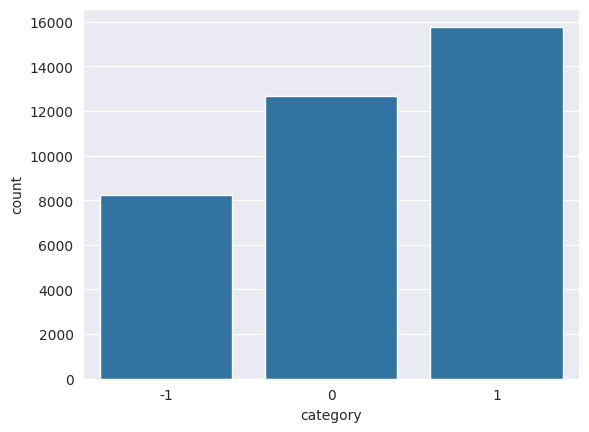

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

In [33]:
# frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    43.01
 0    34.50
-1    22.50
Name: proportion, dtype: float64

In [35]:
df['word_count'] = df['comment'].apply(lambda x: len(x.split()))

In [36]:
df.sample(5)

,comment,category,word_count
23969,enough money publish the front page every news...,-1,13
26426,now bjp has movie production arm too when was ...,0,11
15513,dictatorships work too dosent mean shouldn cha...,-1,60
3269,they put gain switch now exactly like the,1,8
24876,these mountains are joke,0,4


In [37]:
df['word_count'].describe()

count    36672.000000
mean        29.474340
std         56.189264
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1306.000000
Name: word_count, dtype: float64

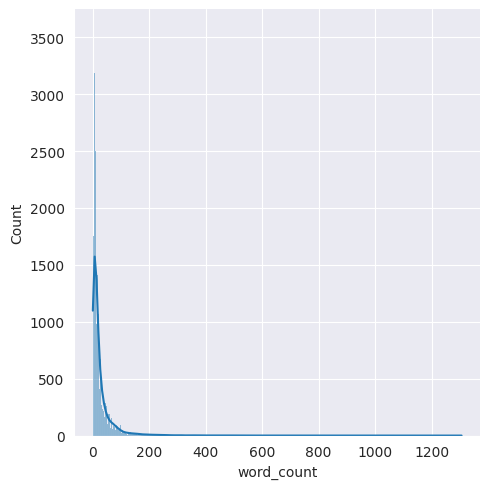

In [38]:
sns.displot(df['word_count'], kde=True)

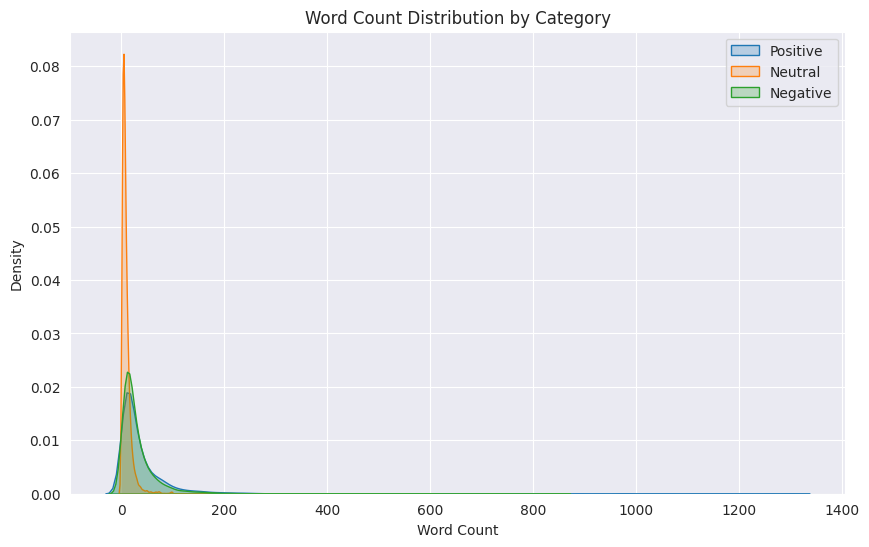

In [39]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.<br>
**Neutral comments (category 0)**: The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.<br>
**Negative comments (category -1)**: These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

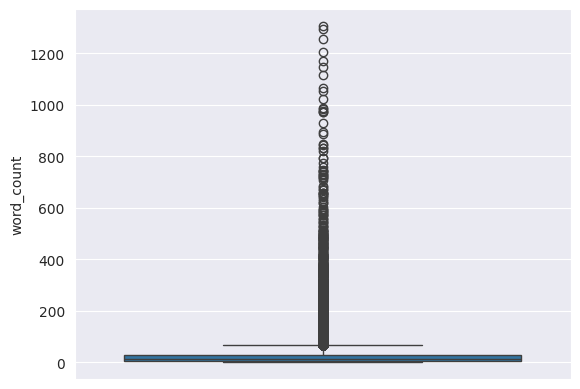

In [40]:
sns.boxplot(df['word_count'])

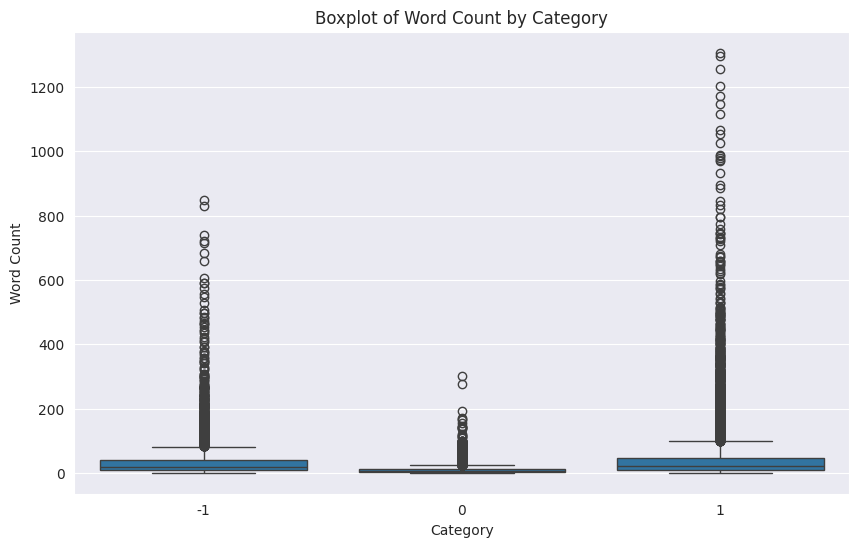

In [41]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

**Positive comments (category 1)**: The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.<br>
**Neutral comments (category 0)**: The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.<br>
**Negative comments (category -1)**: The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

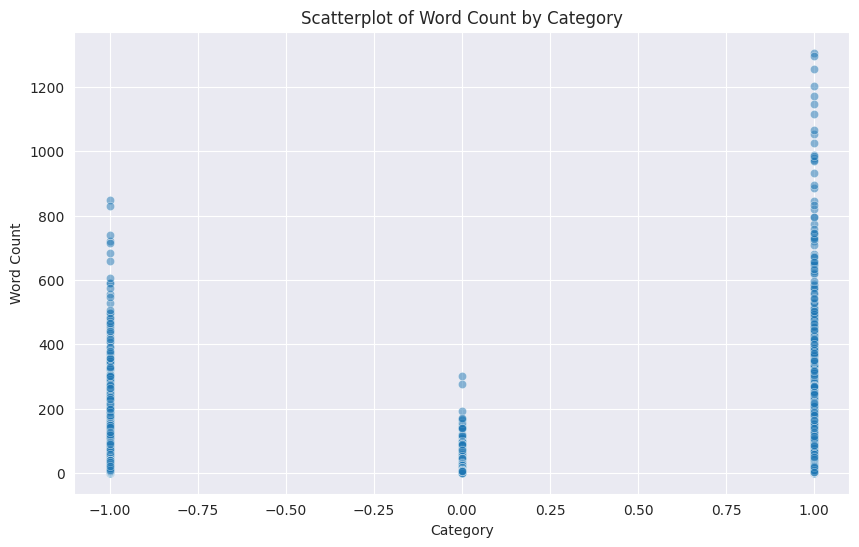

In [42]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

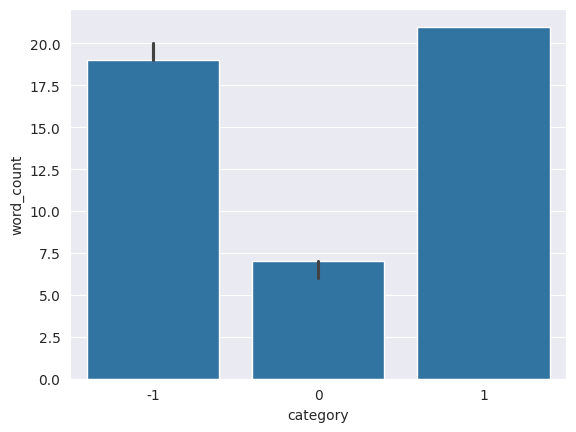

In [43]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

In [45]:
from nltk.corpus import stopwords


# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to /home/spynom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
df.sample(5)

,comment,category,word_count,num_stop_words
13361,you need improve your parody game,-1,6,2
16035,loss loss profit revenues k\nmar turnover,0,7,0
34942,perfect place show his face here torrents are ...,1,13,4
13274,the game that ruins friendships hahaha they funny,-1,8,3
27333,course they are time honored tradition for tou...,0,8,3


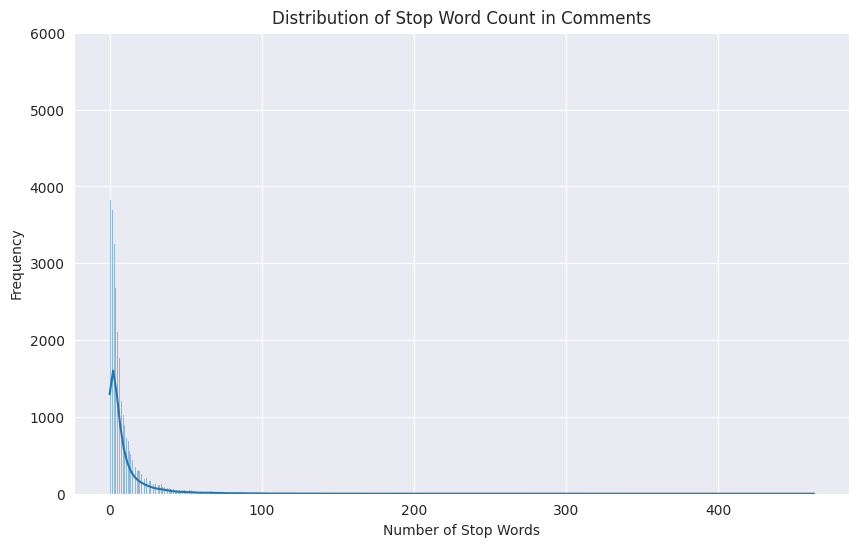

In [47]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


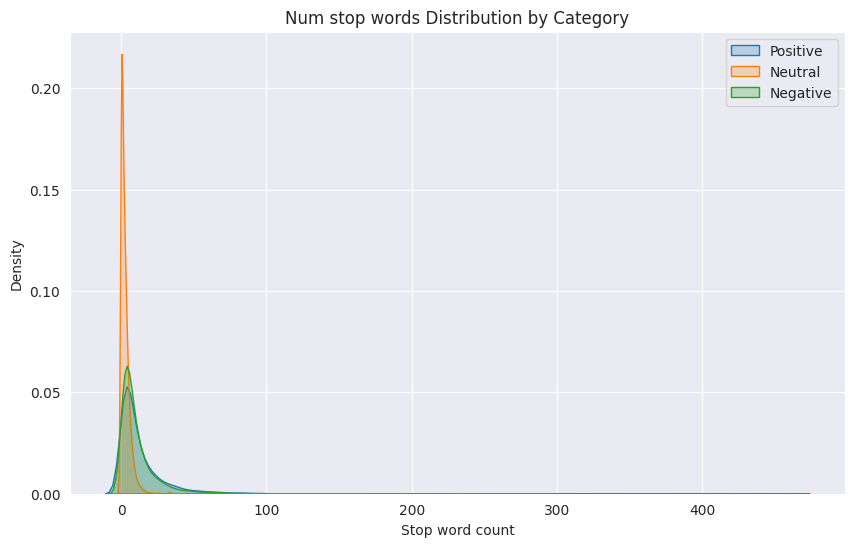

In [48]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

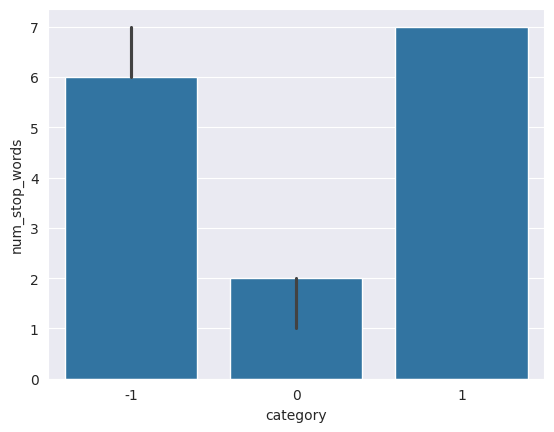

In [49]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')

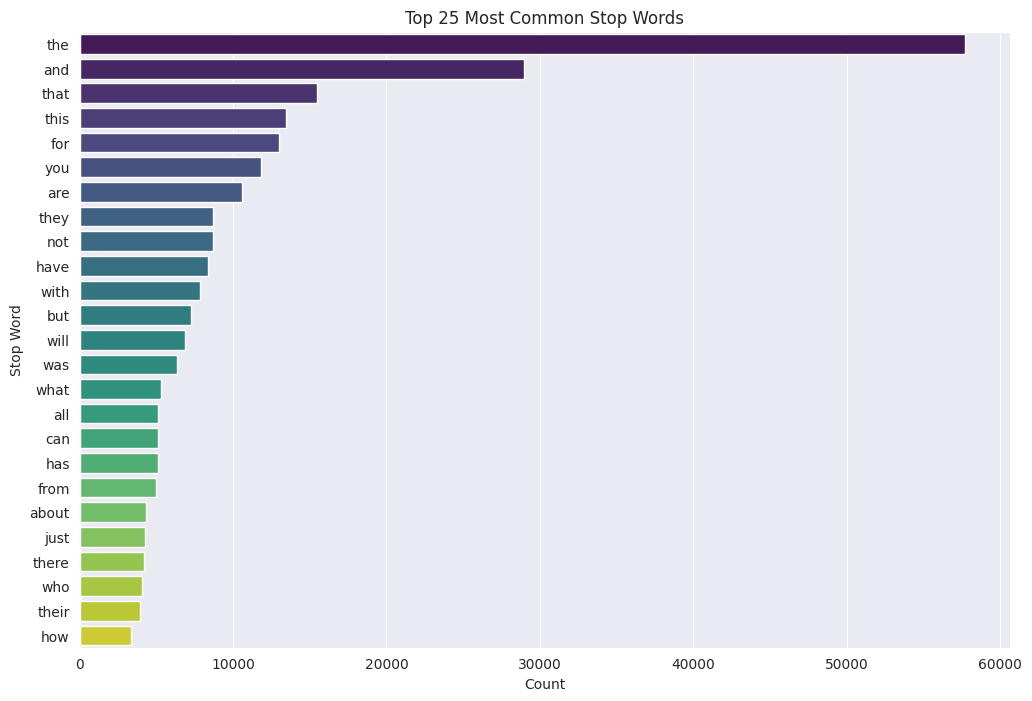

In [52]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis',hue='stop_word')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [53]:
df['num_chars'] = df['comment'].apply(len)

df.head()

,comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [54]:
df["num_chars"].describe()

count    36672.000000
mean       180.922884
std        356.794185
min          2.000000
25%         37.000000
50%         80.000000
75%        183.000000
max       8656.000000
Name: num_chars, dtype: float64

In [56]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [57]:
char_frequency_df['character'].values

array([' ', 'e', 't', 'a', 'i', 'n', 'o', 's', 'r', 'h', 'l', 'd', 'u',
       'c', 'm', 'p', 'g', 'y', 'w', 'b', 'f', 'v', 'k', 'j', 'x', 'z',
       'q', '\n', '\xa0', '\t', '\u2009', '\u2008'], dtype=object)

In [58]:
char_frequency_df.tail(50)

,character,frequency
6,,1080066
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [60]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
2288,bjp won touch vadra vadra didn about his land ...,-1,63,30,353,0
23444,essa manjada parte pra prxima,0,5,0,29,0
26102,cannot express how much joy felt reading this ...,1,28,6,192,0
33673,its not over untill ine them reach million,0,8,4,42,0
36295,every political party has started have cells b...,-1,10,3,69,0


In [62]:
df['num_punctuation_chars'].describe()

count    36672.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

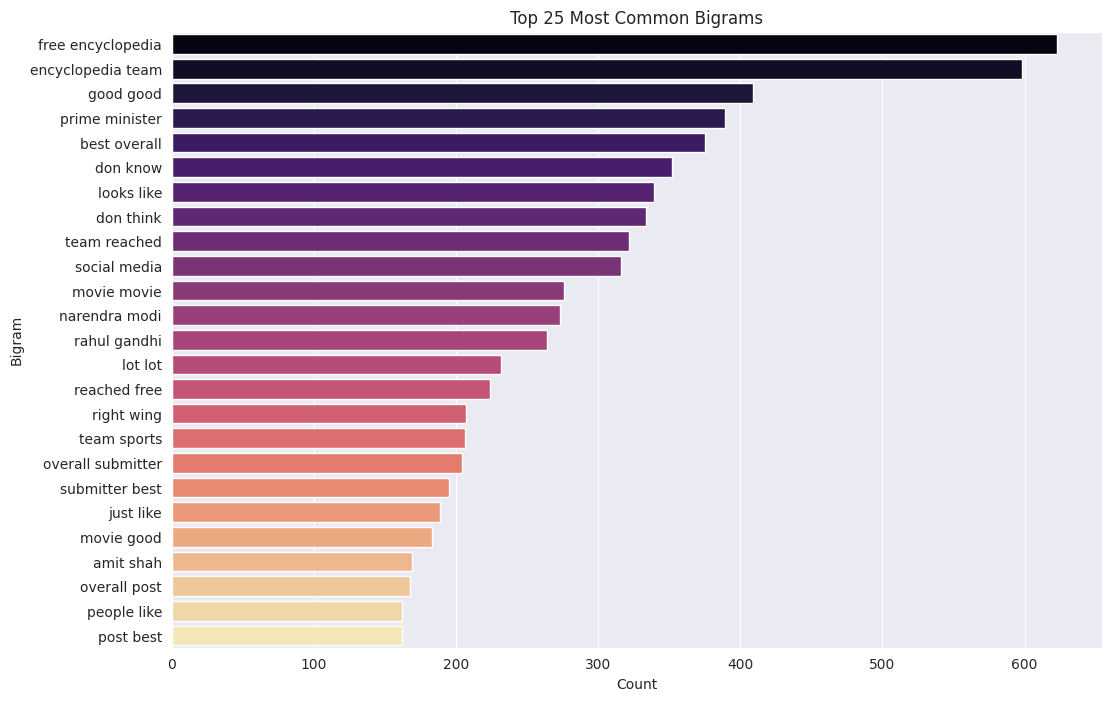

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma',hue='bigram')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


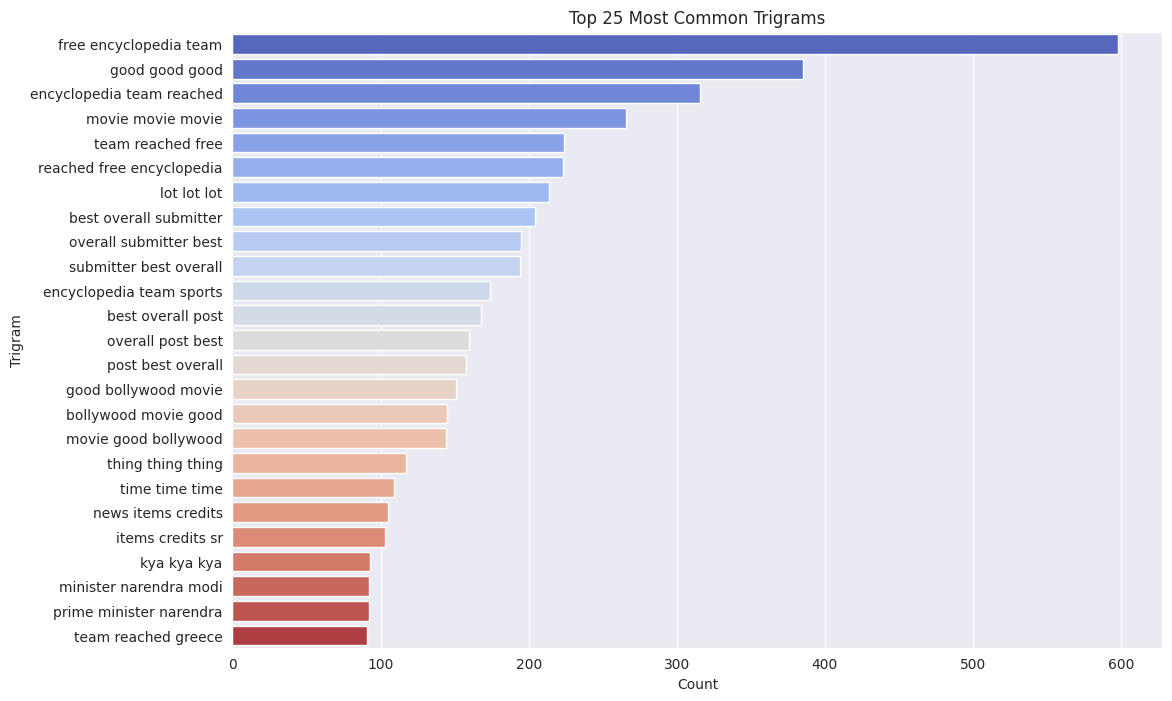

In [67]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm',hue='trigram')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [69]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [70]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,1080066
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [71]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)




In [72]:
from nltk.stem import WordNetLemmatizer


# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /home/spynom/nltk_data...


,comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars,clean_comment
0,family mormon have never tried explain them th...,1,39,13,259,0,family mormon never tried explain still stare ...
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0,buddhism much lot compatible christianity espe...
2,seriously don say thing first all they won get...,-1,86,40,459,0,seriously say thing first get complex explain ...
3,what you have learned yours and only yours wha...,0,29,15,167,0,learned want teach different focus goal not wr...
4,for your own benefit you may want read living ...,1,112,45,690,0,benefit may want read living buddha living chr...


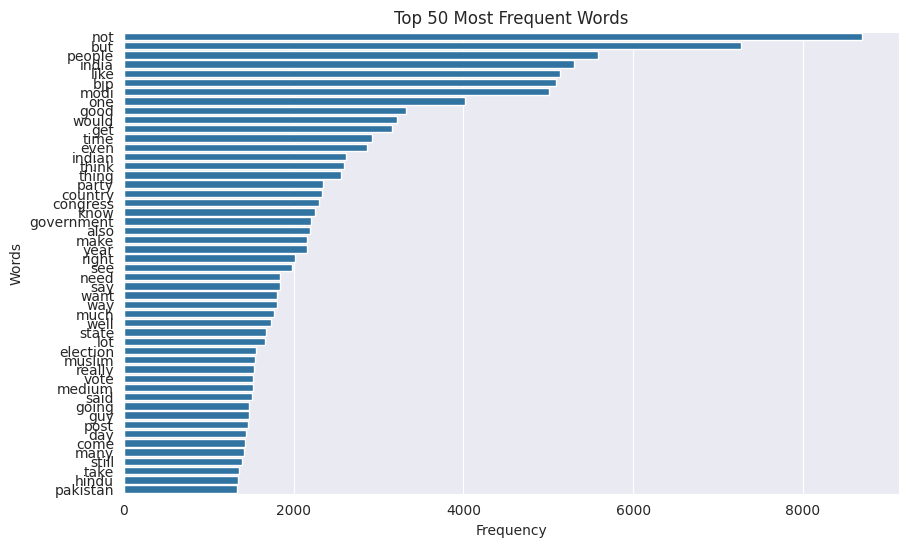

In [75]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


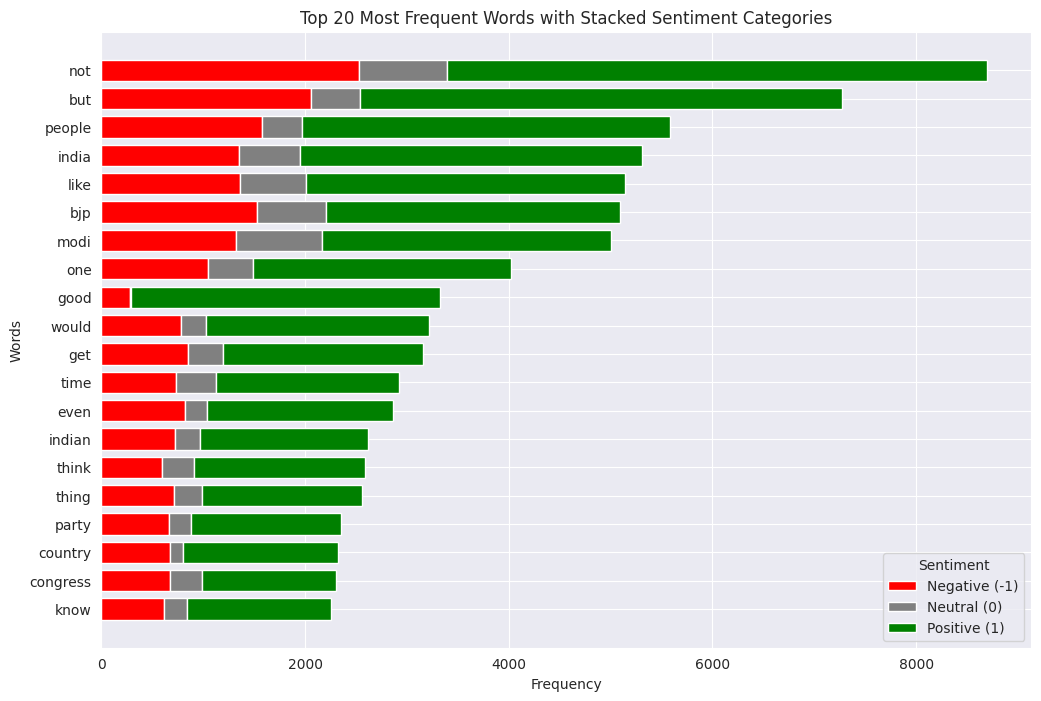

In [76]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)


# Post cleaning

In [6]:
df=read_file("..","data","raw","reddit.csv")

In [7]:
df.sample(5)

,comment,category
9401,were there any actual false flag big time even...,-1
10260,the circlejerk strong itt yes let take joke an...,1
25355,who the fuck applauds this shit wonder these i...,-1
23613,also sanctionsssss,0
35100,pdssydl 2016 三哥的新闻已经快要跟弯弯的一样不忍直视了\n,0


In [29]:
df.isnull().sum()

comment     0
category    0
dtype: int64

In [28]:
df.dropna(inplace=True)

In [32]:
df = df[~(df['comment'].str.strip() == '')].copy()

In [20]:
# Define the list of English stopwords
stop_words = set(stopwords.words('english')) - {"not", "however", "although", "but"}

In [30]:
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()

    # Remove trailing and leading whitespaces
    comment = comment.strip()

    # Remove newline characters
    comment = re.sub(r'\n', ' ', comment)

    # Remove non-alphanumeric characters, except punctuation
    comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

    # Remove stopwords but retain important ones for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

    return comment

In [33]:
df["comment"] = df["comment"].apply(preprocess_comment)

In [35]:
df.to_csv(os.path.join("..","data","processed","cleaned.csv"),index=False)